In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-05T01:50:41.820128+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn: 0.13.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
teeplot: 1.4.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8358230590820312e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.486940860748291}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.003938913345336914}
!!! {"init_...": 0.0005514621734619141}
!!! {"ete3Tree": 0.6511213779449463}
!!! {"GenomeTree_hierarchical": 0.0028417110443115234}
!!! {"mutateBranchETEhierarchy": 0.09374427795410156}
!!! {"write_genome_short": 0.04954695701599121}


  4%|▍         | 8/193 [00:03<00:54,  3.40it/s]

!!! {"writeGenomeNoIndels": 0.16965055465698242}
!!! {"pl.DataFrame": 0.04521489143371582}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.021944284439087}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0172574520111084}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033082962036132812}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001323223114013672}
!!! {"init_...": 0.00046181678771972656}
!!! {"ete3Tree": 7.62939453125e-05}
!!! {"GenomeTree_hierarchical": 0.00213623046875}
!!! {"mutateBranchETEhierarchy": 1.4781951904296875e-05}
!!! {"write_genome_short": 6.771087646484375e-05}
!!

  7%|▋         | 14/193 [00:03<00:26,  6.76it/s]

!!! {"phastSimRun": 0.00010967254638671875}
!!! {"init_...": 0.0005295276641845703}
!!! {"ete3Tree": 0.0008182525634765625}
!!! {"GenomeTree_hierarchical": 0.0026831626892089844}
!!! {"mutateBranchETEhierarchy": 0.00013256072998046875}
!!! {"write_genome_short": 0.00013303756713867188}
!!! {"writeGenomeNoIndels": 0.00023984909057617188}
!!! {"pl.DataFrame": 0.00012755393981933594}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.007151365280151367}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00020170211791992188}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003030061721801758}
enter log_context_duration f

 13%|█▎        | 26/193 [00:03<00:11, 14.63it/s]

!!! {"init_...": 0.0008270740509033203}
!!! {"ete3Tree": 0.020633935928344727}
!!! {"GenomeTree_hierarchical": 0.001984834671020508}
!!! {"mutateBranchETEhierarchy": 0.004896402359008789}
!!! {"write_genome_short": 0.002294778823852539}
!!! {"writeGenomeNoIndels": 0.007806539535522461}
!!! {"pl.DataFrame": 0.0015878677368164062}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04181194305419922}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0008678436279296875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.765655517578125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004036426544189453}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00016522407531

 19%|█▉        | 37/193 [00:03<00:06, 24.07it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.574920654296875e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003427267074584961}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001125335693359375}
!!! {"init_...": 0.00043964385986328125}
!!! {"ete3Tree": 6.532669067382812e-05}
!!! {"GenomeTree_hierarchical": 0.0021178722381591797}
!!! {"mutateBranchETEhierarchy": 1.1444091796875e-05}
!!! {"write_genome_short": 6.580352783203125e-05}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 7.677078247070312e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0045473575592041016}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000206232

 25%|██▍       | 48/193 [00:04<00:04, 33.13it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.765655517578125e-05}
len(phylogeny_df)=3540, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008722066879272461}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001373291015625}
!!! {"init_...": 0.0004925727844238281}
!!! {"ete3Tree": 0.021221160888671875}
!!! {"GenomeTree_hierarchical": 0.0026977062225341797}
!!! {"mutateBranchETEhierarchy": 0.00473332405090332}
!!! {"write_genome_short": 0.002347707748413086}
!!! {"writeGenomeNoIndels": 0.008558273315429688}
!!! {"pl.DataFrame": 0.0016863346099853516}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04363536834716797}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00101161003112

 32%|███▏      | 62/193 [00:04<00:02, 45.91it/s]

!!! {"write_genome_short": 0.0005438327789306641}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 7.128715515136719e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005006313323974609}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018835067749023438}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003103017807006836}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011038780212402344}
!!! {"init_...": 0.0004432201385498047}
!!! {"ete3Tree": 6.4849853515625e-05}
!!! {"GenomeTree_hierarchical": 0.0028319358825683594}
!!! {"mutateBranchETEhierarchy": 1.1444091

 36%|███▌      | 69/193 [00:04<00:02, 50.62it/s]

!!! {"init_...": 0.0008969306945800781}
!!! {"ete3Tree": 7.152557373046875e-05}
!!! {"GenomeTree_hierarchical": 0.002869844436645508}
!!! {"mutateBranchETEhierarchy": 1.0967254638671875e-05}
!!! {"write_genome_short": 0.0002968311309814453}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 7.43865966796875e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005915641784667969}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002117156982421875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030570030212402344}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011062

 42%|████▏     | 81/193 [00:04<00:02, 44.88it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032453536987304688}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013113021850585938}
!!! {"init_...": 0.0004215240478515625}
!!! {"ete3Tree": 6.270408630371094e-05}
!!! {"GenomeTree_hierarchical": 0.002170085906982422}
!!! {"mutateBranchETEhierarchy": 1.0728836059570312e-05}
!!! {"write_genome_short": 6.890296936035156e-05}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 8.249282836914062e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004529714584350586}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000209

 45%|████▌     | 87/193 [00:04<00:02, 43.33it/s]

!!! {"ete3Tree": 0.02097463607788086}
!!! {"GenomeTree_hierarchical": 0.0022606849670410156}
!!! {"mutateBranchETEhierarchy": 0.00511479377746582}
!!! {"write_genome_short": 0.002717256546020508}
!!! {"writeGenomeNoIndels": 0.008199453353881836}
!!! {"pl.DataFrame": 0.0015783309936523438}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0437619686126709}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00091552734375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031561851501464844}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001385211944580078}
!!! {"init_...": 0.000478267669677734

 51%|█████▏    | 99/193 [00:05<00:02, 44.29it/s]

!!! {"pl.DataFrame": 0.002405405044555664}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05341815948486328}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0011663436889648438}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031158924102783203}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013637542724609375}
!!! {"init_...": 0.00045990943908691406}
!!! {"ete3Tree": 9.512901306152344e-05}
!!! {"GenomeTree_hierarchical": 0.0021643638610839844}
!!! {"mutateBranchETEhierarchy": 1.8358230590820312e-05}
!!! {"write_genome_short": 7.390975952148438e-05}
!!! {"writeGenomeNoIndels": 1.57356

 57%|█████▋    | 110/193 [00:05<00:01, 47.39it/s]

!!! {"write_genome_short": 0.0017123222351074219}
!!! {"writeGenomeNoIndels": 0.0044062137603759766}
!!! {"pl.DataFrame": 0.0010755062103271484}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.024796485900878906}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005702972412109375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.288818359375e-05}
len(phylogeny_df)=13, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031223297119140625}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012040138244628906}
!!! {"init_...": 0.0004184246063232422}
!!! {"ete3Tree": 0.0001308917999267578}
!!! {"GenomeTree_hierarchical": 0.002562999725341797}
!!! {"mutateBranchETEhierarchy": 2.479553222

 63%|██████▎   | 122/193 [00:05<00:01, 51.69it/s]

!!! {"phastSimRun": 0.00011444091796875}
!!! {"init_...": 0.0005748271942138672}
!!! {"ete3Tree": 6.914138793945312e-05}
!!! {"GenomeTree_hierarchical": 0.002715587615966797}
!!! {"mutateBranchETEhierarchy": 1.2159347534179688e-05}
!!! {"write_genome_short": 9.369850158691406e-05}
!!! {"writeGenomeNoIndels": 1.0013580322265625e-05}
!!! {"pl.DataFrame": 7.43865966796875e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006109476089477539}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019741058349609375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003031492233276367}
enter log_context_duration for _do_

 70%|██████▉   | 135/193 [00:05<00:01, 54.95it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=825, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004608631134033203}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001316070556640625}
!!! {"init_...": 0.0004222393035888672}
!!! {"ete3Tree": 0.0057353973388671875}
!!! {"GenomeTree_hierarchical": 0.0020759105682373047}
!!! {"mutateBranchETEhierarchy": 0.0011377334594726562}
!!! {"write_genome_short": 0.0006422996520996094}
!!! {"writeGenomeNoIndels": 0.0019605159759521484}
!!! {"pl.DataFrame": 0.0004448890686035156}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.014120101928710938}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00042

 73%|███████▎  | 141/193 [00:05<00:00, 56.25it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=25, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003287076950073242}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011777877807617188}
!!! {"init_...": 0.00041103363037109375}
!!! {"ete3Tree": 0.0002281665802001953}
!!! {"GenomeTree_hierarchical": 0.002103090286254883}
!!! {"mutateBranchETEhierarchy": 7.605552673339844e-05}
!!! {"write_genome_short": 8.940696716308594e-05}
!!! {"writeGenomeNoIndels": 6.413459777832031e-05}
!!! {"pl.DataFrame": 9.298324584960938e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004723072052001953}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00022

 79%|███████▉  | 153/193 [00:06<00:00, 44.63it/s]

!!! {"ete3Tree": 0.028626441955566406}
!!! {"GenomeTree_hierarchical": 0.0027649402618408203}
!!! {"mutateBranchETEhierarchy": 0.006484508514404297}
!!! {"write_genome_short": 0.0033524036407470703}
!!! {"writeGenomeNoIndels": 0.011351823806762695}
!!! {"pl.DataFrame": 0.0022733211517333984}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05741405487060547}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0011954307556152344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=4147, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009280204772949219}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001399517059326172}
!!! {"init_...": 0.00048351

 82%|████████▏ | 158/193 [00:06<00:00, 43.79it/s]

!!! {"write_genome_short": 0.0004725456237792969}
!!! {"writeGenomeNoIndels": 1.1205673217773438e-05}
!!! {"pl.DataFrame": 0.00012612342834472656}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005308389663696289}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003142356872558594}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2375, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0068874359130859375}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013566017150878906}
!!! {"init_...": 0.00048470497131347656}
!!! {"ete3Tree": 0.014523983001708984}
!!! {"GenomeTree_hierarchical": 0.0027022361755371094}
!!! {"mutateBranchETEhierarchy": 0.

 84%|████████▍ | 163/193 [00:07<00:02, 10.97it/s]

!!! {"mutateBranchETEhierarchy": 0.042867422103881836}
!!! {"write_genome_short": 0.024465084075927734}
!!! {"writeGenomeNoIndels": 0.07494854927062988}
!!! {"pl.DataFrame": 0.012933969497680664}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.33069705963134766}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.005964040756225586}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003145456314086914}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001392364501953125}
!!! {"init_...": 0.0004661083221435547}
!!! {"ete3Tree": 0.00010371208190917969}
!!! {"GenomeTree_hierarchical": 0.0022604465484

 87%|████████▋ | 167/193 [00:07<00:01, 13.17it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.8371810913085938e-05}
len(phylogeny_df)=1503, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005828857421875}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015282630920410156}
!!! {"init_...": 0.0004572868347167969}
!!! {"ete3Tree": 0.00964975357055664}
!!! {"GenomeTree_hierarchical": 0.0020651817321777344}
!!! {"mutateBranchETEhierarchy": 0.0020525455474853516}
!!! {"write_genome_short": 0.0012068748474121094}
!!! {"writeGenomeNoIndels": 0.0035042762756347656}
!!! {"pl.DataFrame": 0.0007860660552978516}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.021540403366088867}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00059962

 92%|█████████▏| 178/193 [00:08<00:00, 20.22it/s]

!!! {"ete3Tree": 0.06446099281311035}
!!! {"GenomeTree_hierarchical": 0.0021169185638427734}
!!! {"mutateBranchETEhierarchy": 0.015692472457885742}
!!! {"write_genome_short": 0.007700681686401367}
!!! {"writeGenomeNoIndels": 0.02557849884033203}
!!! {"pl.DataFrame": 0.004768848419189453}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12282085418701172}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0023910999298095703}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031881332397460938}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014829635620117188}
!!! {"init_...": 0.0004787445068

 95%|█████████▍| 183/193 [00:08<00:00, 24.12it/s]

!!! {"ete3Tree": 0.009285449981689453}
!!! {"GenomeTree_hierarchical": 0.0027365684509277344}
!!! {"mutateBranchETEhierarchy": 0.0021562576293945312}
!!! {"write_genome_short": 0.0014874935150146484}
!!! {"writeGenomeNoIndels": 0.0036537647247314453}
!!! {"pl.DataFrame": 0.0007390975952148438}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.022168874740600586}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005338191986083984}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003063201904296875}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010704994201660156}
!!! {"init_...": 0.0004062

100%|██████████| 193/193 [00:08<00:00, 22.98it/s]

!!! {"phastSimRun": 0.00012755393981933594}
!!! {"init_...": 0.0005984306335449219}
!!! {"ete3Tree": 6.341934204101562e-05}
!!! {"GenomeTree_hierarchical": 0.0021347999572753906}
!!! {"mutateBranchETEhierarchy": 1.049041748046875e-05}
!!! {"write_genome_short": 6.914138793945312e-05}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 0.000102996826171875}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005234956741333008}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00021529197692871094}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=25, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003095865249633789}
enter log_context_duration for 

exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.28127169609069824}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.03079509735107422}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003644704818725586}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03316164016723633}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0020503997802734375}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003650665283203125}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03303885459899902}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002605915069580078}
enter log_context_duration for seq_arr

 43%|████▎     | 3/7 [00:00<00:00, 22.53it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03345322608947754}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0035011768341064453}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0038852691650390625}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.0334162712097168}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003380298614501953}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0036852359771728516}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismat

100%|██████████| 7/7 [00:00<00:00, 23.34it/s]

exit log_context_duration for seq_arr
!!! {"seq_arr": 0.004220247268676758}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03539586067199707}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003492116928100586}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0021009445190429688}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.020682334899902344}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0029447078704833984}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_dif

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.28223085403442383}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 4086/4086 [00:25<00:00, 158.34it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 29.35087752342224}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 603.33it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 137.2590925693512}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.07442092895507812}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 200.51795101165771}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.008945465087890625}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.00036525726318359375}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.00040268898010253906}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0004181861877441406}
ancestral


100%|██████████| 368/368 [00:00<00:00, 182879.61it/s]

process mutations:   0%|          | 1/368 [00:00<01:19,  4.64it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:16<12:28,  2.08s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   18.2s



process mutations:  13%|█▎        | 48/368 [00:58<06:19,  1.19s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.1min



process mutations:  24%|██▍       | 88/368 [01:44<05:24,  1.16s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.9min



process mutations:  35%|███▍      | 128/368 [02:30<04:37,  1.16s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  2.7min



process mutations:  46%|████▌     | 168/368 [03:14<03:47,  1.14s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.4min



process mutations:  57%|█████▋    | 208/368 [03:58<02:59,  1.12s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  4.2min



process mutations:  67%|██████▋   | 248/368 [04:44<02:15,  1.13s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  5.0min



process mutations:  78%|███████▊  | 288/368 [05:29<01:30,  1.13s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  5.8min



process mutations:  89%|████████▉ | 328/368 [06:15<00:45,  1.13s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  6.5min



process mutations: 100%|██████████| 368/368 [07:03<00:00,  1.15s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  7.1min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  7.2min finished


process replicate: 100%|██████████| 1/1 [10:38<00:00, 638.86s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.09050440788269043}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 112
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> '963757fe-e986-8fc6-8055-c808530383ad', '963757fe-e986-8fc6-8055-c808530383ad', '963757fe-e986-8fc6-8055-c80853
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


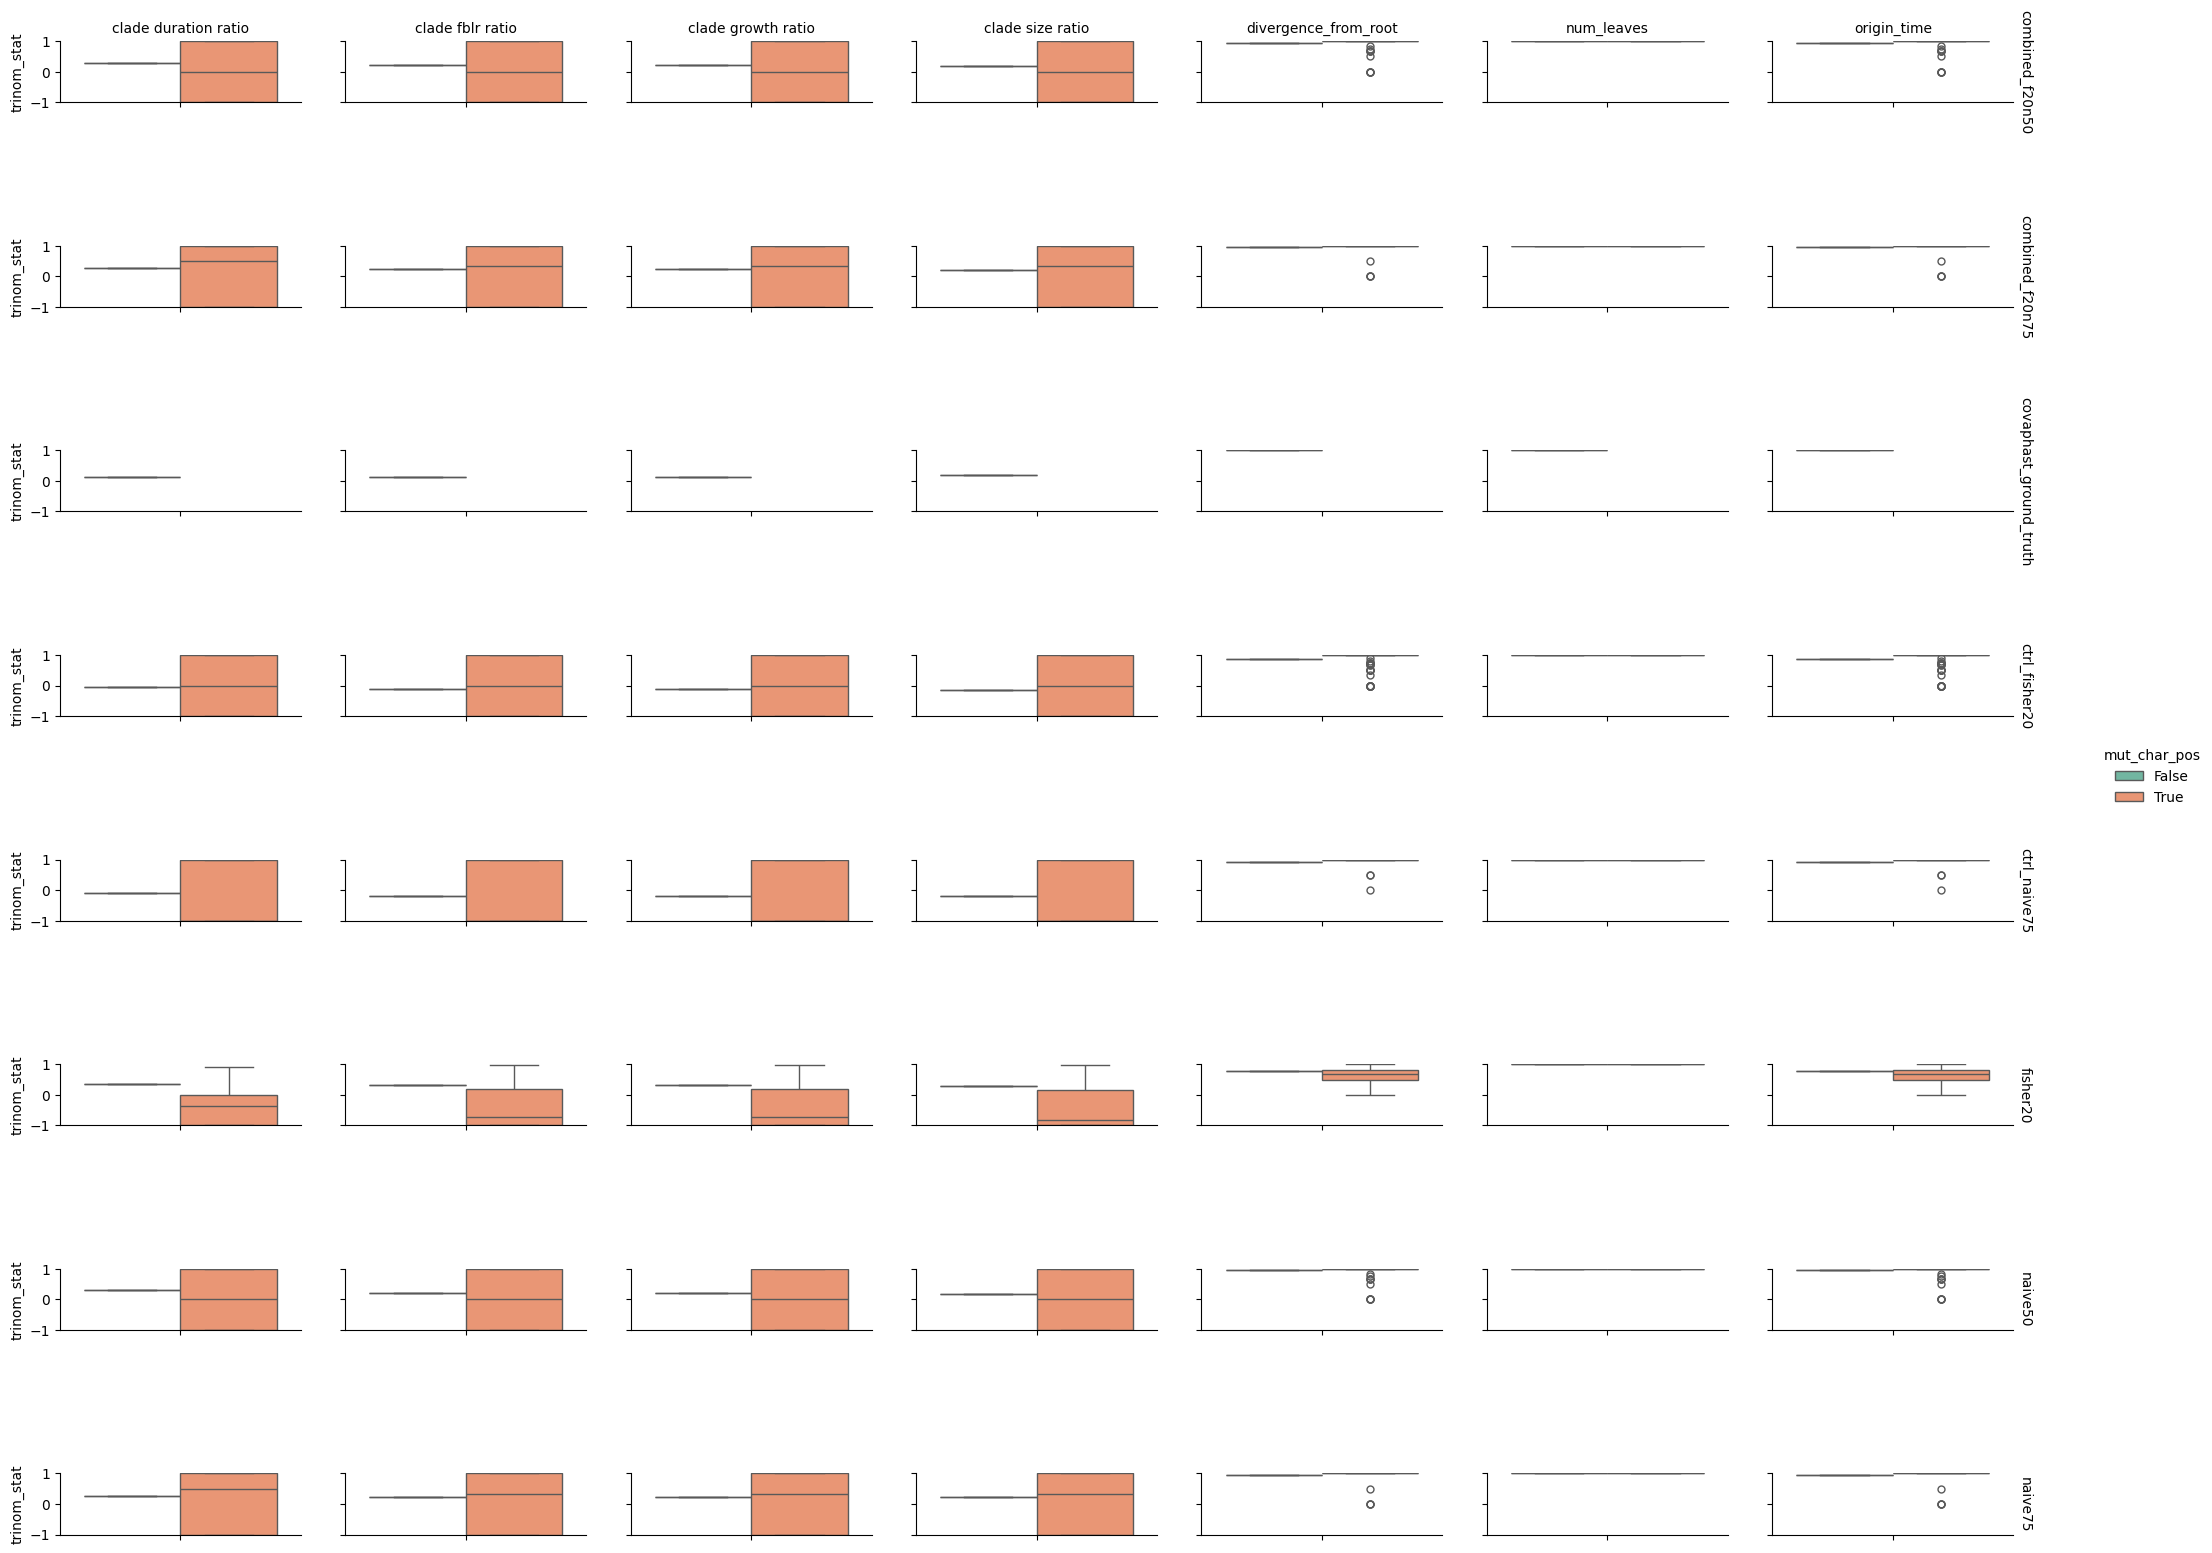

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


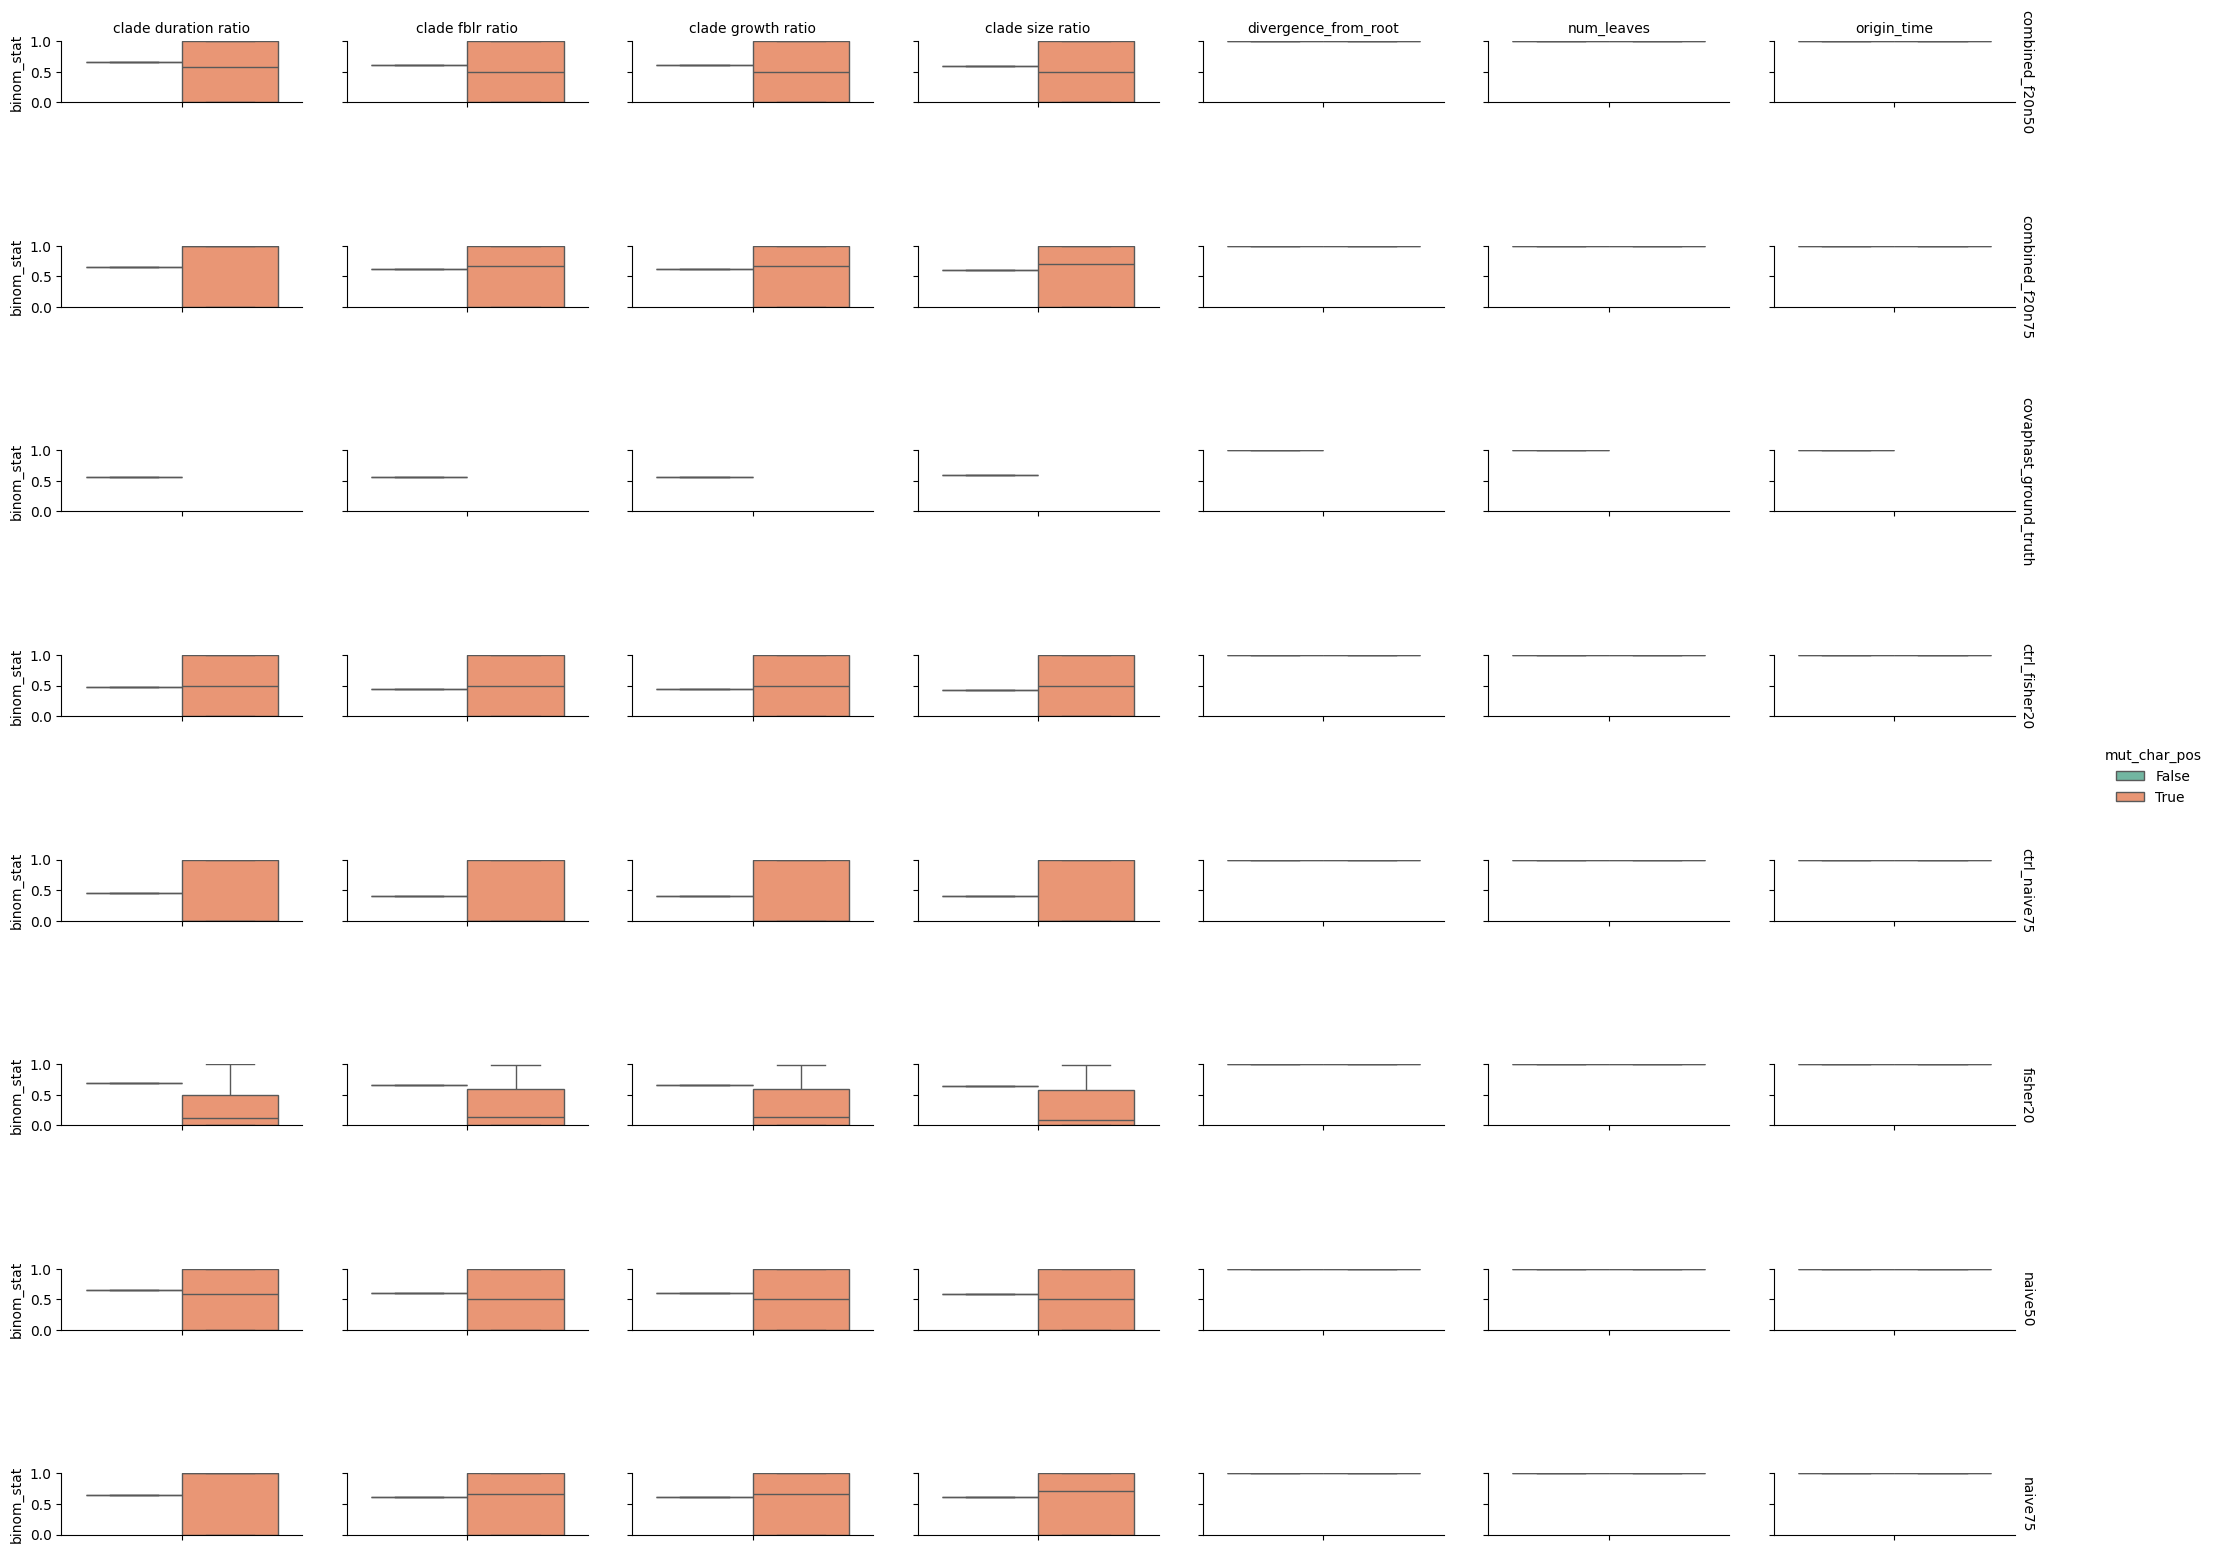

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


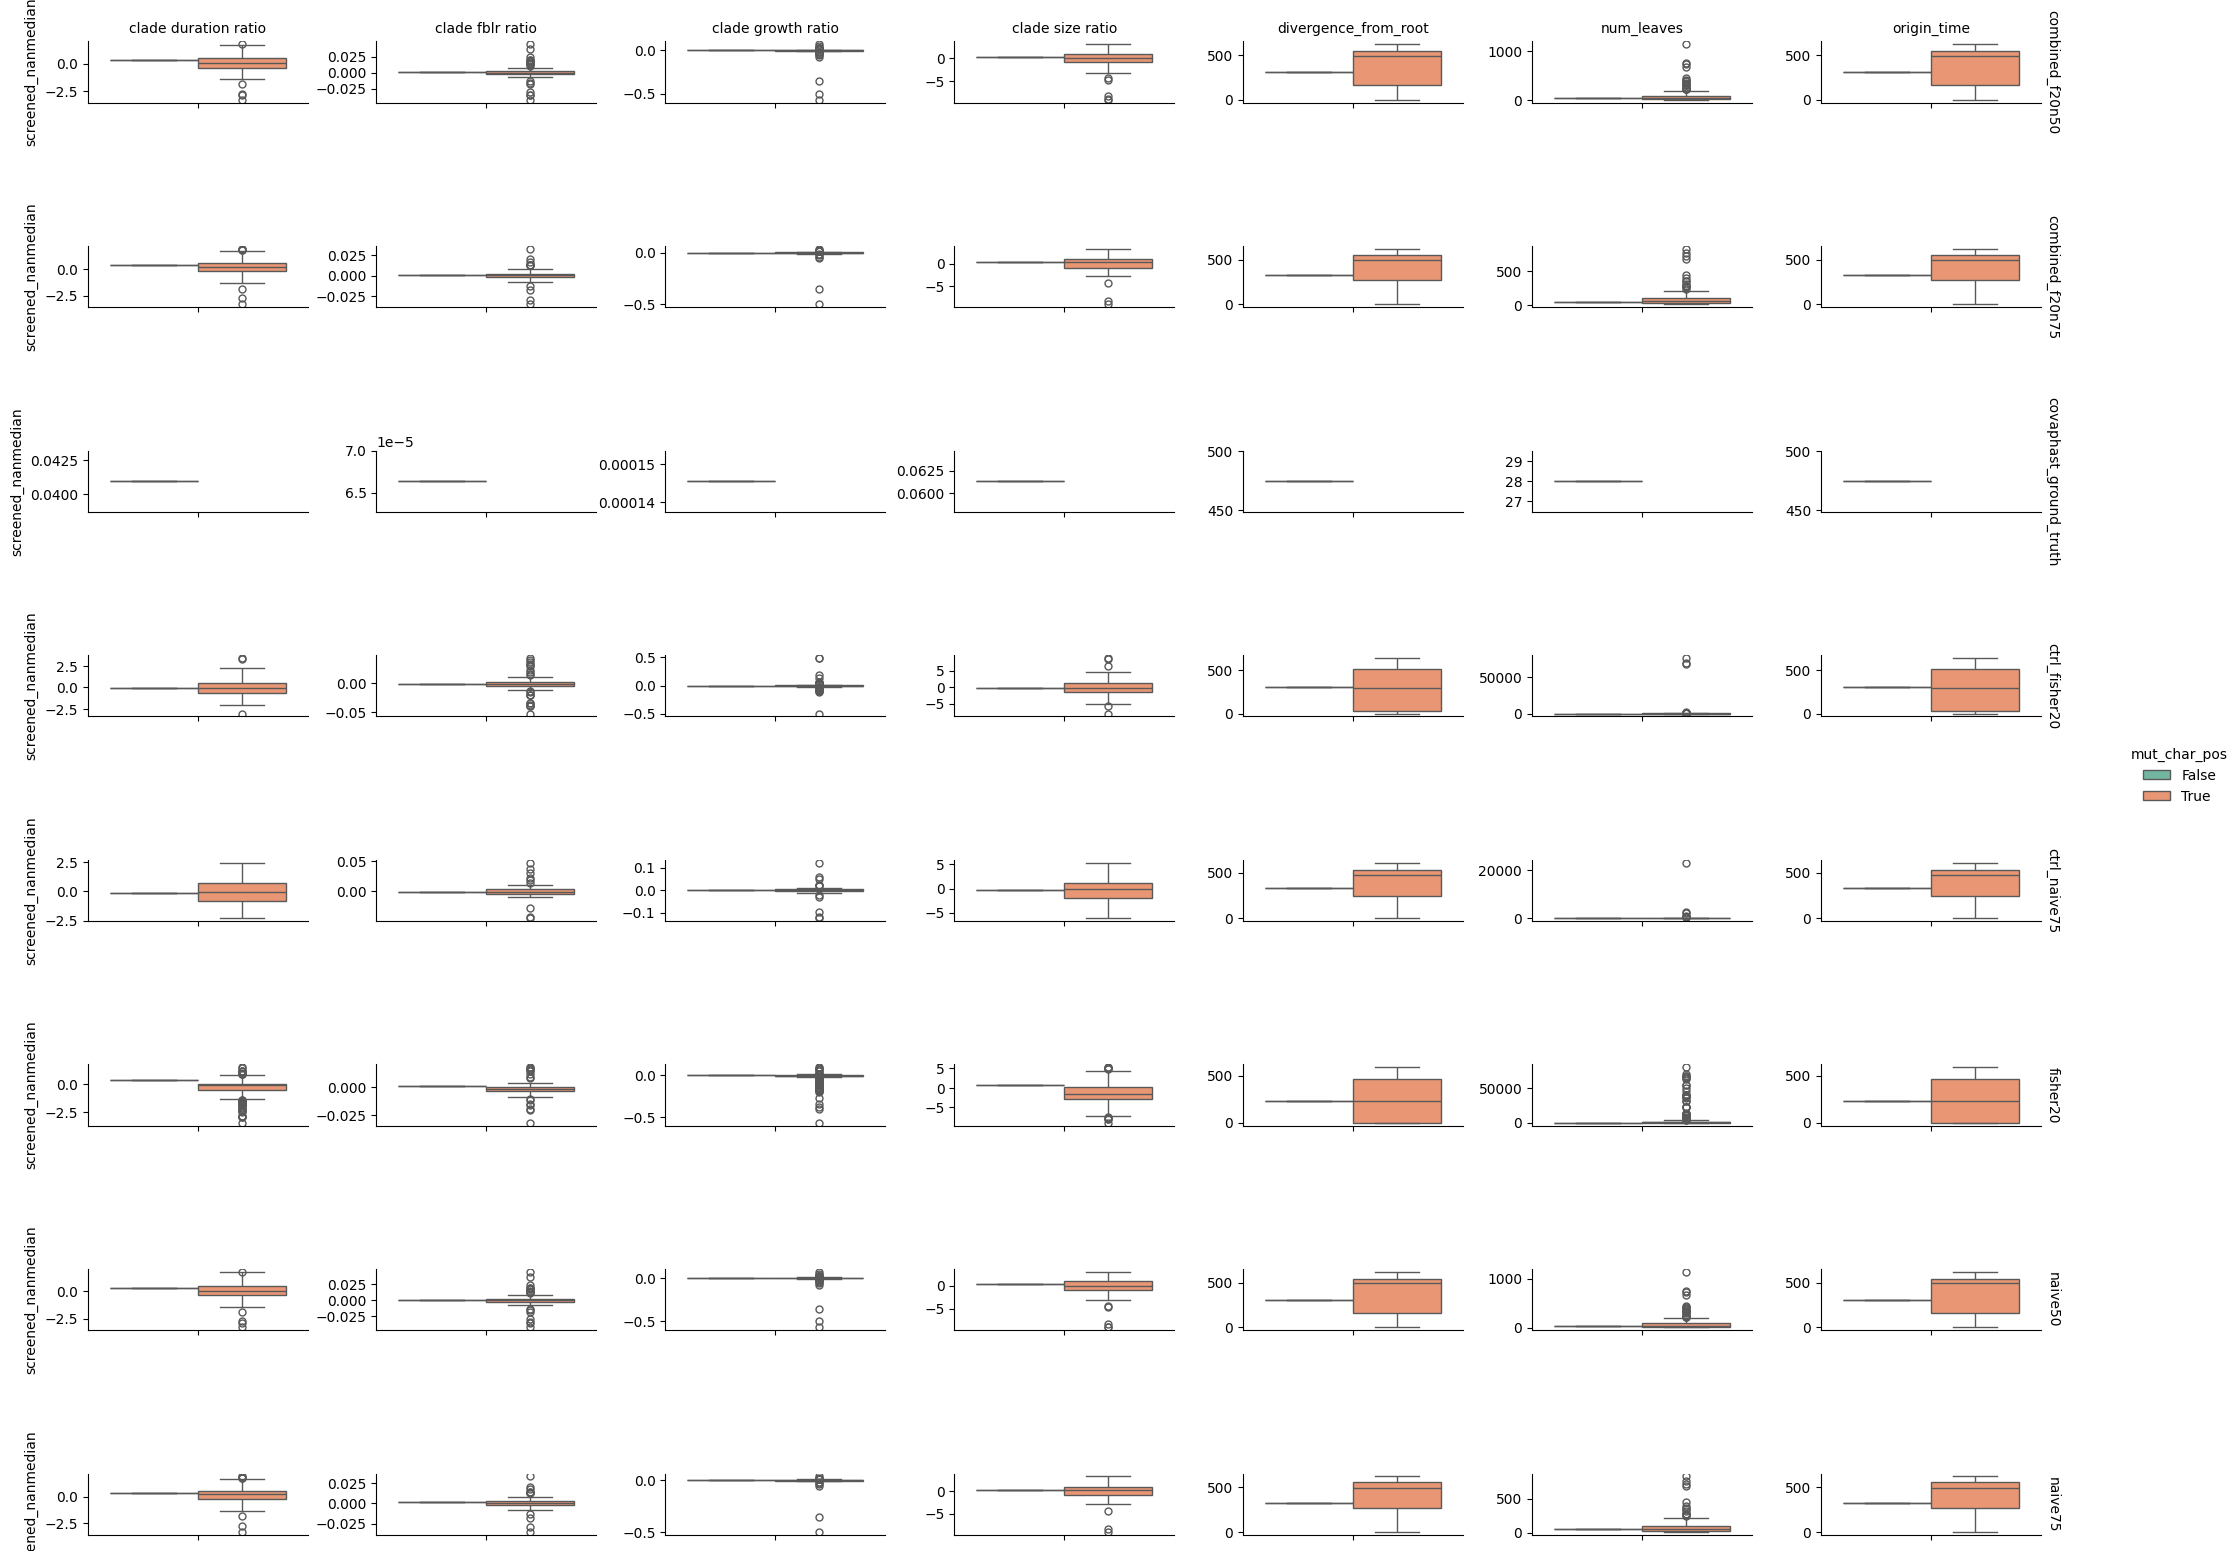

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


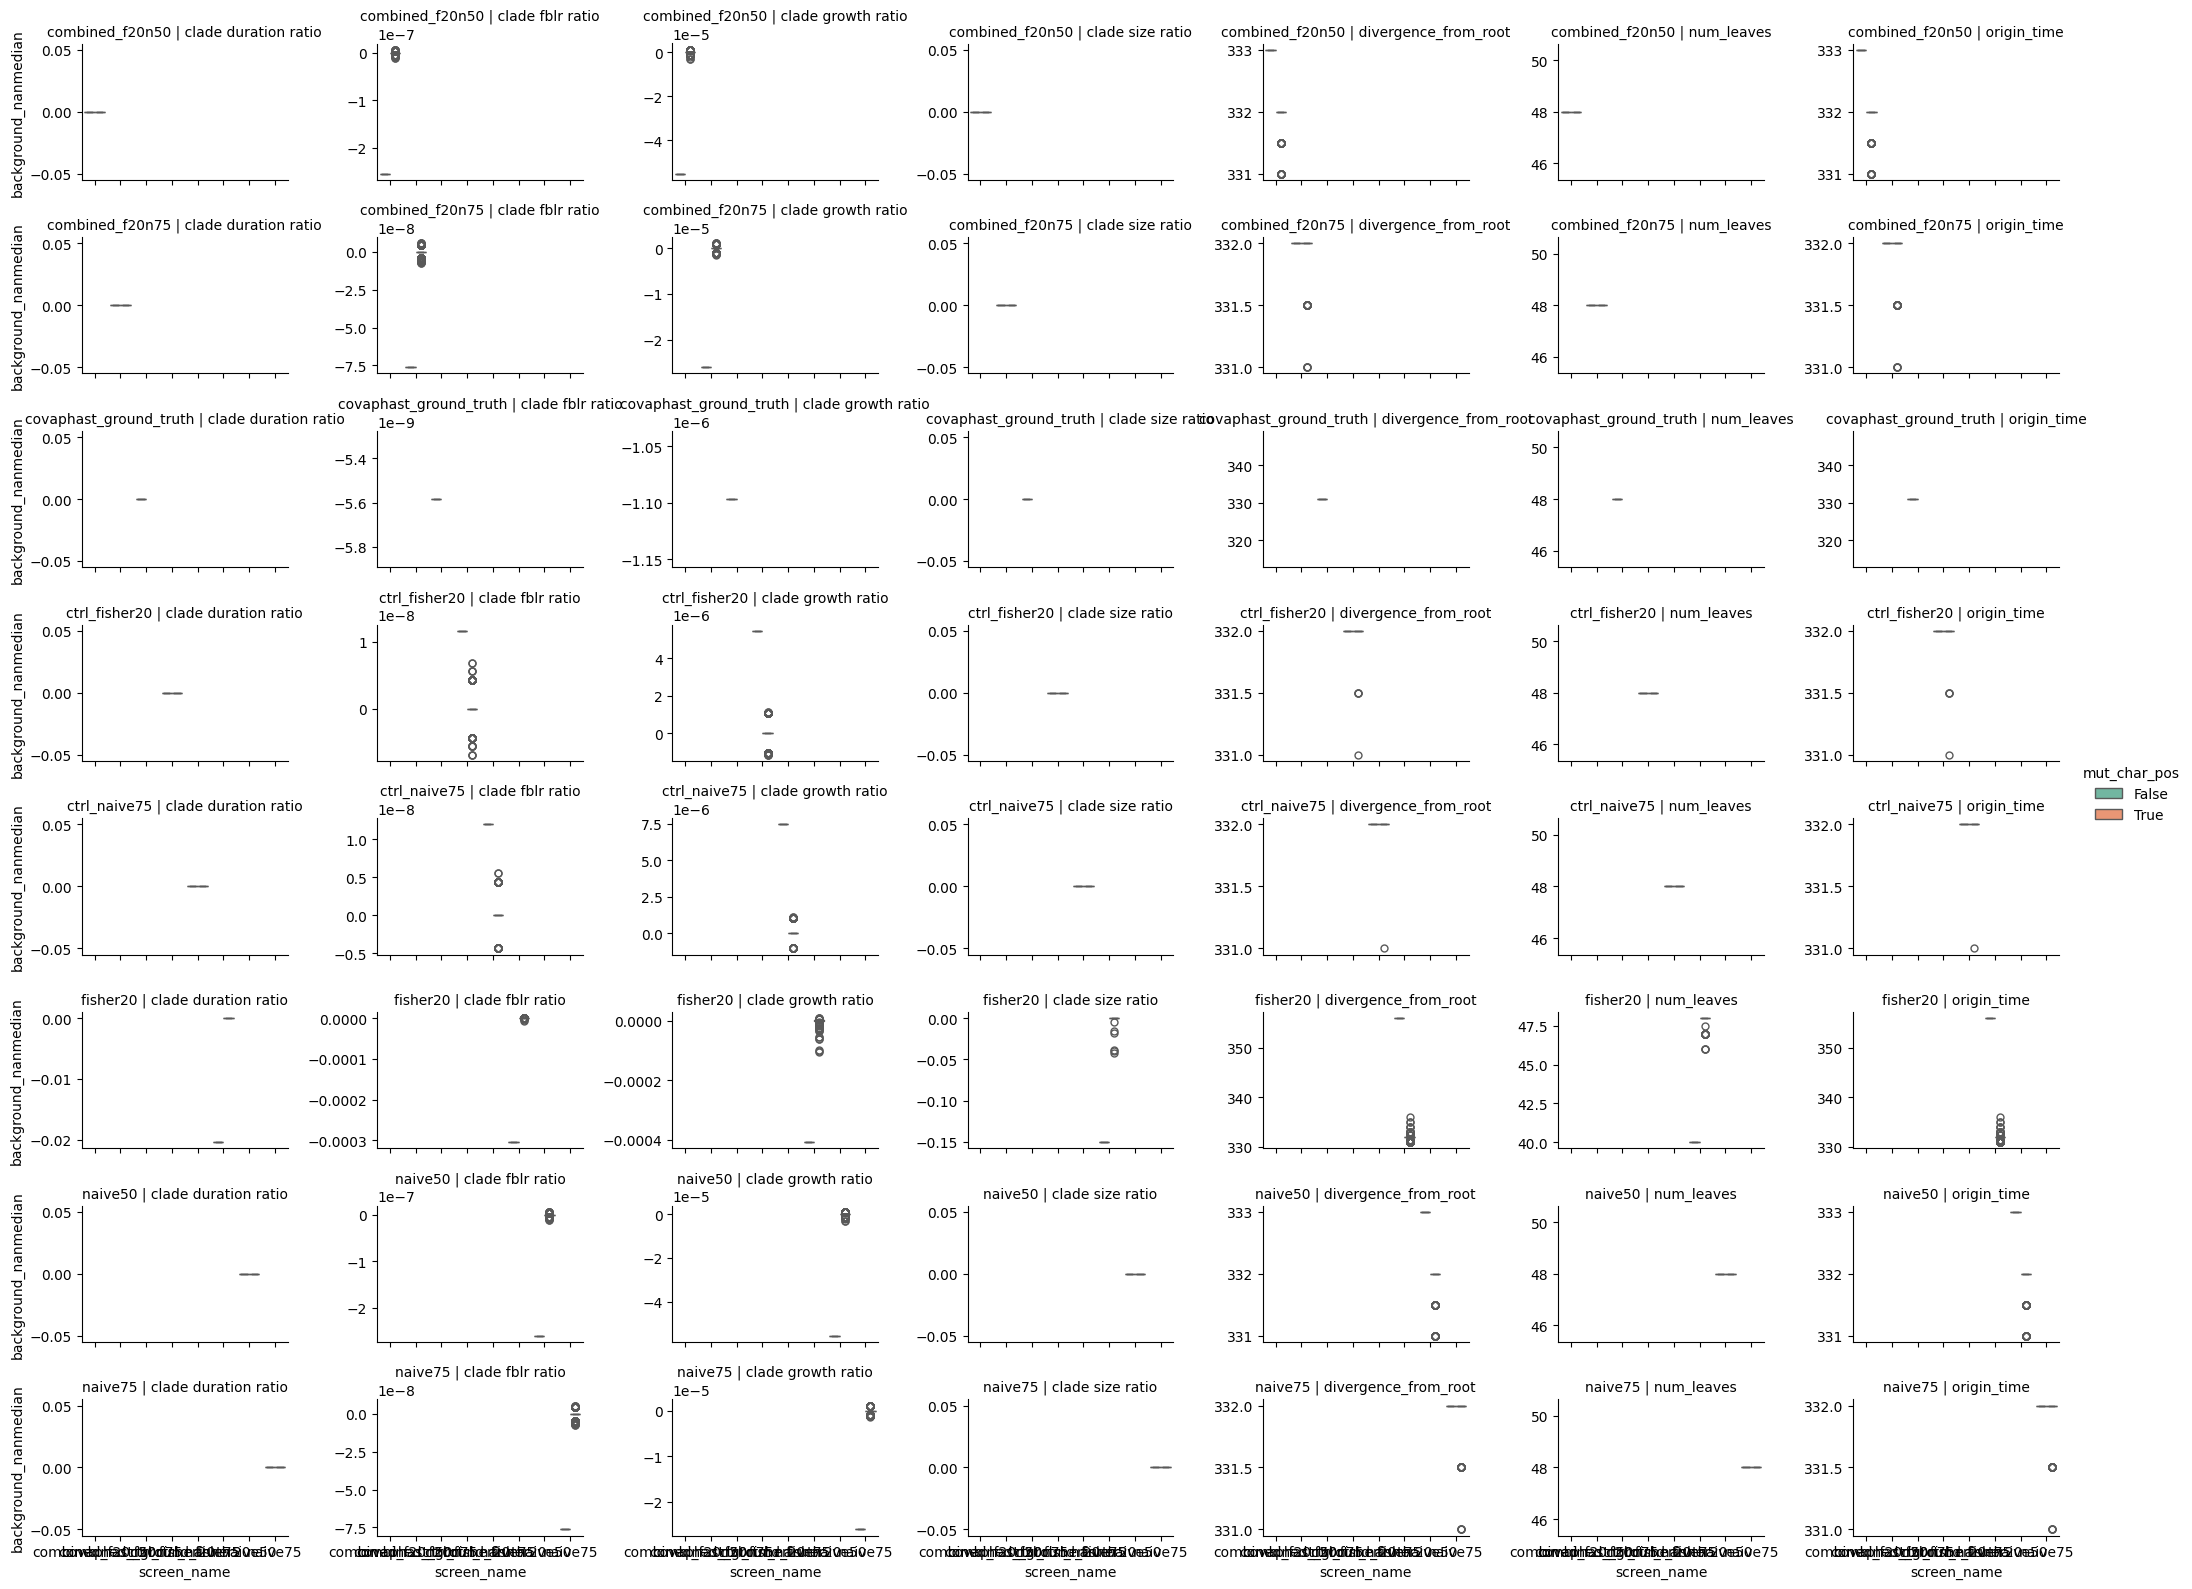

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
